# Neural network
Supervised learning with labelled data
We have an input vector or tensor. We have layers with weights and biases + activation functions. 
It is important that the activation functions have to be not linear. We have also the outputs there are the result of the application funtion applied to the result of multiplication between weights and the input vector x. <br>
The model give us the prediction vector that compared to the real values, give us loss and we use the optimizer to optimize the weights to decrease the loss.
The accuracy is the metric that we are using to evaluate the model also during the training.
With the mnist we made classification in ten different classes (loss function = categorical cross entropy)

# Flow
We are in a NLP domain (Natural Language Processing)

In this model we will work for binary classification. We have to classify the films' feedbacks based on the sentiment analysis. So we have labels (0 if negative and 1 if positive) as binary output

imdb is an array with 25k elements, each one of different length. These arrays are composed by numbers and the maximum lehgth is 2494. 

To match the numbers with the words, we need to download a dictionary. To use the dictionary (word_index - ~30k elements) we need to reverse its order so we have the numbers as key and the words as values. In this case we can "translate" the array into text.

But for the model we'll not use the dictionary, because we now that the maximun index in our array is 10k, so we'll use bag of words, where basically we create a new matrix of all zeros with as many rows as the data and 10k columns. Using the fancy index, we'll put 1 when there is correspondence between the index and the word. And this will be the input of our neural network.

General:
It is important that in the classification problem the training test is balanced. 

In [ ]:
#Let's start importing the dataset

In [36]:
from keras.datasets import imdb
import numpy as np

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
#in this way we are using the most 10000 words used and cutting out the others

In [37]:
x=[]
for i in train_data:
    x.append(len(i))
import pandas as pd
x = pd.DataFrame(x)
x.describe()

,0
count,25000.000000
mean,238.713640
std,176.497204
min,11.000000
25%,130.000000
50%,178.000000
75%,291.000000
max,2494.000000


### Different way to do it
import numpy as np
lenghts = [len(x) for x in train_data]#list comprehension
print('min=',np.min(lenghts))
print('mean',np.mean(lenghts))
print('std=',np.std(lenghts))
print('max',np.max(lenghts))

### Cropping (cut away some part) and Padding (adding as many 0 to lists to get them 2494 long)
### Normalizing we would loose semantic sense of the numbers
### corpus = collections of data of text to analyze vocabulary

In [38]:
#Let's import the dictionary to get the words corresponding to the numbers of our array
word_index = imdb.get_word_index()

In [39]:
#Let's reverse the dictionary
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [40]:
#To get the text from an array we can use the get function that let us index an array - LIST COMPREHENSION
decoded_array = ' '.join([reverse_word_index.get(i,'?') for i in train_data[0]])
print(decoded_array)
print('\n The label of this text is:',train_labels[0])

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

## Bag of Words
We will use for start the bag of words where we take the unique words in the text loosing also the order of the words and the counting

The number of indexes in the array is maximun 10k. So we create a matrix with same rows as our data and 10k columns.
We use fancy indexing to put 1 when the word is in the array or 0 if not.

### We are using fancy indexing
We pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values

In [56]:
#Transforming the training data in numpy array

def vectorize_sequences(sequences,dimension=10000):  #take sequenses and turn them into vectors
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.0   #fancy indexing
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print('the maximum number in the array is:',max(np.max(train_data)),'--> for this reason the dimension has to be 10k')
print(x_train[0])
print(x_train[0].shape)
print(x_train.shape)

the maximum number in the array is: 9995 --> for this reason the dimension has to be 10k
[0. 1. 1. ... 0. 0. 0.]
(10000,)
(25000, 10000)


In [60]:
#Transforming the labels
print('transforming labels from',type(train_labels),'to',type(y_train))
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

transforming labels from <class 'numpy.ndarray'> to <class 'numpy.ndarray'>


# Defining the Neural Network Architecture

In [58]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))  #the number of columns is the number of features
model.add(layers.Dense(1, activation='sigmoid'))  #because we are doing binary classification and we have to
#predict

model.summary()  #neural network architecture

"""
from keras import optimizers, losses, metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy]) #square parenthesis because it's not a class
"""

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#rmsprop because it's always a good start

#160033 is number of weights plus biases

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


### Validation
If loss is low, the model is good for optimizing the problem
If the loss is low in test set, the model is good in generalizing
Information leak
Validation data when we split data in 70 train,10 validation, test =20
so we validate the model on validation before the test set so we can more fine tuning
The first important thing to evaluate in a model is a validation loss, instead of the training loss (also accuracy, always related to the validation)

In [61]:
#sometimes it's good to shuffle but being sure that labels and data are 
#connected to each other and there is a method for shuffle
x_val = x_train[:10000]
partial_x_train = x_train[10000:]  #the rest of 25000
y_val = y_train[:10000]
partial_y_train=y_train[10000:]
#In our case 25k as train (15k trian), 10k as validation and 25k for test

In [62]:
history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=256, 
          validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 6s 370us/step - loss: 0.4484 - acc: 0.8162 - val_loss: 0.3157 - val_acc: 0.8840
Epoch 2/4
15000/15000 [==============================] - 3s 204us/step - loss: 0.2365 - acc: 0.9207 - val_loss: 0.2796 - val_acc: 0.8917
Epoch 3/4
15000/15000 [==============================] - 2s 164us/step - loss: 0.1747 - acc: 0.9456 - val_loss: 0.2772 - val_acc: 0.8885
Epoch 4/4
15000/15000 [==============================] - 2s 162us/step - loss: 0.1395 - acc: 0.9594 - val_loss: 0.2880 - val_acc: 0.8865


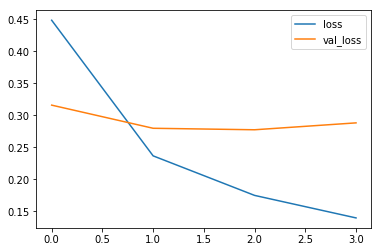

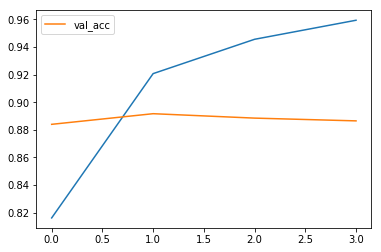

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')  #two graph in same scale 
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()
plt.show()
plt.close()